In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def split_func(string):
    return re.split(' |\n',string, 1)[0]

In [3]:
df = pd.read_excel('Список студентов с персональными данными и оценками.xlsx')

In [4]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Курс (с),Баркод,Фамилия студента,Имя студента,Отчество студента,Статус студента,...,Гражданство студента,ВСК1,ВСК2,Сумма ВСК,Экзамен,Итоговая,Статус ВСК1,Статус ВСК2,Попытка экзамена FX,Летник
0,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,2110038,Аббасова,Насиба,Зинурдиновна,Обучается,...,Республика Казахстан,91.0,91.0,182.0,70.0,83.0,1.0,1.0,0.0,0.0
1,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,2110038,Аббасова,Насиба,Зинурдиновна,Обучается,...,Республика Казахстан,67.0,70.0,137.0,60.0,65.0,1.0,1.0,1.0,0.0
2,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,2110038,Аббасова,Насиба,Зинурдиновна,Обучается,...,Республика Казахстан,82.0,79.0,161.0,50.0,68.0,1.0,1.0,0.0,0.0
3,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,2110038,Аббасова,Насиба,Зинурдиновна,Обучается,...,Республика Казахстан,84.0,77.0,161.0,50.0,68.0,1.0,1.0,1.0,0.0
4,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,2110038,Аббасова,Насиба,Зинурдиновна,Обучается,...,Республика Казахстан,0.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67679,7M01701 Foreign language: two foreign languages,"Магистратура (2 годичное, научно-педагогическое)",Очное,English,1,2248923,Қабдуманап,Айкүміс,NaN,Обучается,...,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67680,6B04118 ACCA бойынша Есеп және Аудит,Бакалавриат,Очное,Kazakh,2,2218029,Сейдилдаева,Ақбөпе,Айдарқызы,Обучается,...,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67681,6B04128 Менеджмент,Бакалавриат,Очное,Kazakh,2,2219331,Алигожина,Анар,Жумабаевна,Обучается,...,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67682,6B04128 Менеджмент,Бакалавриат,Очное,Kazakh,2,2216939,Абдреева,Арайлым,Мейримхановна,Обучается,...,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.set_index('Баркод')

In [6]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Курс (с),Фамилия студента,Имя студента,Отчество студента,Статус студента,Тип студента,...,Гражданство студента,ВСК1,ВСК2,Сумма ВСК,Экзамен,Итоговая,Статус ВСК1,Статус ВСК2,Попытка экзамена FX,Летник
Баркод,,,,,,,,,,,,,,,,,,,,,
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,Аббасова,Насиба,Зинурдиновна,Обучается,Обычный студент,...,Республика Казахстан,91.0,91.0,182.0,70.0,83.0,1.0,1.0,0.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,Аббасова,Насиба,Зинурдиновна,Обучается,Обычный студент,...,Республика Казахстан,67.0,70.0,137.0,60.0,65.0,1.0,1.0,1.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,Аббасова,Насиба,Зинурдиновна,Обучается,Обычный студент,...,Республика Казахстан,82.0,79.0,161.0,50.0,68.0,1.0,1.0,0.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,Аббасова,Насиба,Зинурдиновна,Обучается,Обычный студент,...,Республика Казахстан,84.0,77.0,161.0,50.0,68.0,1.0,1.0,1.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,2,Аббасова,Насиба,Зинурдиновна,Обучается,Обычный студент,...,Республика Казахстан,0.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248923,7M01701 Foreign language: two foreign languages,"Магистратура (2 годичное, научно-педагогическое)",Очное,English,1,Қабдуманап,Айкүміс,NaN,Обучается,Обычный студент,...,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2218029,6B04118 ACCA бойынша Есеп және Аудит,Бакалавриат,Очное,Kazakh,2,Сейдилдаева,Ақбөпе,Айдарқызы,Обучается,Обычный студент,...,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219331,6B04128 Менеджмент,Бакалавриат,Очное,Kazakh,2,Алигожина,Анар,Жумабаевна,Обучается,Обычный студент,...,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(['Фамилия студента', 'Имя студента', 'Отчество студента', 'Сумма ВСК', 'Статус ВСК1',	'Статус ВСК2', 'Курс (с)'], axis=1)

In [8]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Возраст студента,Пол студента,Гражданство студента,ВСК1,ВСК2,Экзамен,Итоговая,Попытка экзамена FX,Летник
Баркод,,,,,,,,,,,,,,,,
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,Обучается,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,91.0,91.0,70.0,83.0,0.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,Обучается,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,67.0,70.0,60.0,65.0,1.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,Обучается,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,82.0,79.0,50.0,68.0,0.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,Обучается,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,84.0,77.0,50.0,68.0,1.0,0.0
2110038,6B11105 Менеджмент гостеприимства,Бакалавриат,Очное,Russian,Обучается,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,0.0,0.0,0.0,70.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248923,7M01701 Foreign language: two foreign languages,"Магистратура (2 годичное, научно-педагогическое)",Очное,English,Обучается,Обычный студент,Платно,29.0,Женский,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN
2218029,6B04118 ACCA бойынша Есеп және Аудит,Бакалавриат,Очное,Kazakh,Обучается,Обычный студент,Платно,18.0,Женский,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN
2219331,6B04128 Менеджмент,Бакалавриат,Очное,Kazakh,Обучается,Обычный студент,Платно,19.0,Женский,Республика Казахстан,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum()

ОП                         1
Уровень (с)                0
Форма обучения (с)         0
Язык обучения (с)          0
Статус студента            0
Тип студента               0
Метод оплаты               0
Возраст студента        8195
Пол студента            1786
Гражданство студента    1720
ВСК1                    1140
ВСК2                    1140
Экзамен                 1157
Итоговая                1139
Попытка экзамена FX     1139
Летник                  1139
dtype: int64

In [10]:
df.drop(df[df['Статус студента'] == 'Обучается'].index, inplace = True)

In [11]:
df.drop(df[df['Статус студента'] == 'Академ.отпуск'].index, inplace = True)

In [12]:
df.isna().sum()

ОП                         0
Уровень (с)                0
Форма обучения (с)         0
Язык обучения (с)          0
Статус студента            0
Тип студента               0
Метод оплаты               0
Возраст студента        2617
Пол студента             510
Гражданство студента     487
ВСК1                      33
ВСК2                      33
Экзамен                   43
Итоговая                  33
Попытка экзамена FX       33
Летник                    33
dtype: int64

In [13]:
df = df[df['Экзамен'].notna()]

In [14]:
df.isna().sum()

ОП                         0
Уровень (с)                0
Форма обучения (с)         0
Язык обучения (с)          0
Статус студента            0
Тип студента               0
Метод оплаты               0
Возраст студента        2601
Пол студента             500
Гражданство студента     477
ВСК1                       0
ВСК2                       0
Экзамен                    0
Итоговая                   0
Попытка экзамена FX        0
Летник                     0
dtype: int64

In [15]:
age_mean = round(df['Возраст студента'].mean())
print(age_mean)

21


In [16]:
df['Возраст студента'].fillna(value=age_mean, inplace=True)

C:\Users\suzdalskiy.y\AppData\Local\Temp\ipykernel_19932\2525577842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Возраст студента'].fillna(value=age_mean, inplace=True)


In [17]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Возраст студента,Пол студента,Гражданство студента,ВСК1,ВСК2,Экзамен,Итоговая,Попытка экзамена FX,Летник
Баркод,,,,,,,,,,,,,,,,
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,37.0,0.0,0.0,0.0,1.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,6.0,18.0,0.0,0.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,75.0,4.0,0.0,0.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,5.0,0.0,0.0,0.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0,0.0,0.0
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0,0.0,0.0
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df['Пол студента'].value_counts()

Женский    8591
Мужской    6374
Name: Пол студента, dtype: int64

In [19]:
df['Гражданство студента'].value_counts()

Республика Казахстан    14820
Иностранец                168
Name: Гражданство студента, dtype: int64

In [20]:
df['Гражданство студента'].fillna(value='Республика Казахстан', inplace=True)
df['Пол студента'].fillna(value='Женский', inplace=True)

C:\Users\suzdalskiy.y\AppData\Local\Temp\ipykernel_19932\1136665399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Гражданство студента'].fillna(value='Республика Казахстан', inplace=True)
C:\Users\suzdalskiy.y\AppData\Local\Temp\ipykernel_19932\1136665399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Пол студента'].fillna(value='Женский', inplace=True)


In [21]:
df.isna().sum()

ОП                      0
Уровень (с)             0
Форма обучения (с)      0
Язык обучения (с)       0
Статус студента         0
Тип студента            0
Метод оплаты            0
Возраст студента        0
Пол студента            0
Гражданство студента    0
ВСК1                    0
ВСК2                    0
Экзамен                 0
Итоговая                0
Попытка экзамена FX     0
Летник                  0
dtype: int64

In [22]:
df_summer = df[["Попытка экзамена FX", "Летник"]]
df_summer

,Попытка экзамена FX,Летник
Баркод,,
2110221,1.0,0.0
2110221,0.0,0.0
2110221,0.0,0.0
2110221,0.0,0.0
2110221,0.0,0.0
...,...,...
2140491,0.0,0.0
2140491,0.0,0.0
2140491,0.0,0.0


In [23]:
df = df.drop(["Попытка экзамена FX", "Летник"], axis=1)
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Возраст студента,Пол студента,Гражданство студента,ВСК1,ВСК2,Экзамен,Итоговая
Баркод,,,,,,,,,,,,,,
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,37.0,0.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,6.0,18.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,75.0,4.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,5.0,0.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0


In [24]:
result = df.groupby('Баркод').aggregate('mean')

In [25]:
result

,Возраст студента,ВСК1,ВСК2,Экзамен,Итоговая
Баркод,,,,,
30127,21.0,61.000000,61.500000,87.000,71.25
1510096,24.0,28.625000,6.500000,0.000,0.00
1610040,24.0,78.750000,69.375000,71.625,73.25
1611111,26.0,0.000000,1.000000,0.000,0.00
1710012,22.0,74.875000,63.375000,75.375,71.50
...,...,...,...,...,...
2140692,21.0,36.222222,20.111111,0.000,0.00
2140693,21.0,36.111111,20.111111,0.000,0.00
2140694,21.0,37.555556,19.777778,0.000,0.00


In [26]:
result_summer = df_summer.groupby('Баркод').aggregate('sum')
result_summer.loc[1810724]

Попытка экзамена FX    0.0
Летник                 1.0
Name: 1810724, dtype: float64

In [27]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Возраст студента,Пол студента,Гражданство студента,ВСК1,ВСК2,Экзамен,Итоговая
Баркод,,,,,,,,,,,,,,
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,37.0,0.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,6.0,18.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,75.0,4.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,5.0,0.0,0.0,0.0
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0
2140491,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,0.0,0.0,0.0,0.0


In [28]:
df = df[~df.index.duplicated(keep='first')]

In [29]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Возраст студента,Пол студента,Гражданство студента,ВСК1,ВСК2,Экзамен,Итоговая
Баркод,,,,,,,,,,,,,,
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,37.0,0.0,0.0,0.0
2111424,6B04126 Бизнес әкімшілік,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Женский,Республика Казахстан,93.0,91.0,97.0,94.0
2111290,6B11103 Тұрақты туризм,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,18.0,Мужской,Республика Казахстан,0.0,0.0,0.0,0.0
2111109,6B11303 Международная бизнес логистика,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Гос.грант,18.0,Мужской,Республика Казахстан,85.0,78.0,65.0,75.0
2110439,6B06105 Smart технологии,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Платно,18.0,Мужской,Республика Казахстан,88.0,84.0,53.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140505,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,75.0,0.0,0.0,0.0
2140510,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,79.0,0.0,0.0,0.0
2140458,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,21.0,Женский,Республика Казахстан,77.0,0.0,0.0,0.0


In [30]:
df = df.drop(['Возраст студента',	'ВСК1',	'ВСК2',	'Экзамен',	'Итоговая'], axis=1)

In [31]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Пол студента,Гражданство студента
Баркод,,,,,,,,,
2110221,6B11303 \nХалықаралық бизнес логистика,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан
2111424,6B04126 Бизнес әкімшілік,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан
2111290,6B11103 Тұрақты туризм,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан
2111109,6B11303 Международная бизнес логистика,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан
2110439,6B06105 Smart технологии,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Платно,Мужской,Республика Казахстан
...,...,...,...,...,...,...,...,...,...
2140505,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан
2140510,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан
2140458,6B10101 Smart medicine,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан


In [32]:
from sklearn import preprocessing

In [33]:
df["ОП"] = df["ОП"].apply(split_func)

In [34]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Пол студента,Гражданство студента
Баркод,,,,,,,,,
2110221,6B11303,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан
2111424,6B04126,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан
2111290,6B11103,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан
2111109,6B11303,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан
2110439,6B06105,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Платно,Мужской,Республика Казахстан
...,...,...,...,...,...,...,...,...,...
2140505,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан
2140510,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан
2140458,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан


In [35]:
df_copy = df

In [36]:
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [37]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Пол студента,Гражданство студента
Баркод,,,,,,,,,
2110221,45,2,0,1,1,2,0,0,1
2111424,32,2,0,1,1,2,0,0,1
2111290,41,2,0,1,1,2,0,1,1
2111109,45,2,0,2,1,2,0,1,1
2110439,39,2,0,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...
2140505,40,2,0,0,1,2,1,0,1
2140510,40,2,0,0,1,2,1,0,1
2140458,40,2,0,0,1,2,1,0,1


In [38]:
result_summer

,Попытка экзамена FX,Летник
Баркод,,
30127,0.0,0.0
1510096,0.0,0.0
1610040,0.0,0.0
1611111,0.0,0.0
1710012,0.0,0.0
...,...,...
2140692,0.0,0.0
2140693,0.0,0.0
2140694,0.0,0.0


In [39]:
result

,Возраст студента,ВСК1,ВСК2,Экзамен,Итоговая
Баркод,,,,,
30127,21.0,61.000000,61.500000,87.000,71.25
1510096,24.0,28.625000,6.500000,0.000,0.00
1610040,24.0,78.750000,69.375000,71.625,73.25
1611111,26.0,0.000000,1.000000,0.000,0.00
1710012,22.0,74.875000,63.375000,75.375,71.50
...,...,...,...,...,...
2140692,21.0,36.222222,20.111111,0.000,0.00
2140693,21.0,36.111111,20.111111,0.000,0.00
2140694,21.0,37.555556,19.777778,0.000,0.00


In [40]:
result.loc[1810724]

Возраст студента    21.000000
ВСК1                88.666667
ВСК2                91.555556
Экзамен             80.111111
Итоговая            80.000000
Name: 1810724, dtype: float64

In [41]:
df = df.join(result)

In [42]:
df = df.join(result_summer)

In [43]:
df

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Пол студента,Гражданство студента,Возраст студента,ВСК1,ВСК2,Экзамен,Итоговая,Попытка экзамена FX,Летник
Баркод,,,,,,,,,,,,,,,,
2110221,45,2,0,1,1,2,0,0,1,18.0,9.937500,6.562500,4.500000,3.875000,1.0,0.0
2111424,32,2,0,1,1,2,0,0,1,18.0,77.066667,75.933333,64.733333,82.466667,1.0,0.0
2111290,41,2,0,1,1,2,0,1,1,18.0,7.000000,2.400000,0.000000,0.000000,1.0,0.0
2111109,45,2,0,2,1,2,0,1,1,18.0,69.400000,65.800000,57.066667,74.133333,1.0,0.0
2110439,39,2,0,2,1,2,1,1,1,18.0,28.266667,33.000000,25.400000,34.533333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140505,40,2,0,0,1,2,1,0,1,21.0,36.222222,19.888889,0.000000,0.000000,0.0,0.0
2140510,40,2,0,0,1,2,1,0,1,21.0,27.000000,9.888889,0.000000,0.000000,0.0,0.0
2140458,40,2,0,0,1,2,1,0,1,21.0,36.333333,20.111111,0.000000,0.000000,0.0,0.0


In [44]:
df_copy = df_copy.join(result)

In [45]:
df_copy = df_copy.join(result_summer)

In [46]:
df_copy

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Пол студента,Гражданство студента,Возраст студента,ВСК1,ВСК2,Экзамен,Итоговая,Попытка экзамена FX,Летник
Баркод,,,,,,,,,,,,,,,,
2110221,6B11303,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан,18.0,9.937500,6.562500,4.500000,3.875000,1.0,0.0
2111424,6B04126,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан,18.0,77.066667,75.933333,64.733333,82.466667,1.0,0.0
2111290,6B11103,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан,18.0,7.000000,2.400000,0.000000,0.000000,1.0,0.0
2111109,6B11303,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан,18.0,69.400000,65.800000,57.066667,74.133333,1.0,0.0
2110439,6B06105,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Платно,Мужской,Республика Казахстан,18.0,28.266667,33.000000,25.400000,34.533333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140505,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан,21.0,36.222222,19.888889,0.000000,0.000000,0.0,0.0
2140510,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан,21.0,27.000000,9.888889,0.000000,0.000000,0.0,0.0
2140458,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан,21.0,36.333333,20.111111,0.000000,0.000000,0.0,0.0


In [47]:
df.loc[1810724]

ОП                      12.000000
Уровень (с)              2.000000
Форма обучения (с)       0.000000
Язык обучения (с)        2.000000
Статус студента          0.000000
Тип студента             2.000000
Метод оплаты             0.000000
Пол студента             1.000000
Гражданство студента     1.000000
Возраст студента        21.000000
ВСК1                    88.666667
ВСК2                    91.555556
Экзамен                 80.111111
Итоговая                80.000000
Попытка экзамена FX      0.000000
Летник                   1.000000
Name: 1810724, dtype: float64

In [48]:
df_copy.loc[1810724]

ОП                                  5B070400
Уровень (с)                      Бакалавриат
Форма обучения (с)                     Очное
Язык обучения (с)                    Russian
Статус студента                    Выпускник
Тип студента                 Обычный студент
Метод оплаты                       Гос.грант
Пол студента                         Мужской
Гражданство студента    Республика Казахстан
Возраст студента                        21.0
ВСК1                               88.666667
ВСК2                               91.555556
Экзамен                            80.111111
Итоговая                                80.0
Попытка экзамена FX                      0.0
Летник                                   1.0
Name: 1810724, dtype: object

In [49]:
df_copy['Статус студента'].value_counts()

Выпускник    811
Отчислен     690
Name: Статус студента, dtype: int64

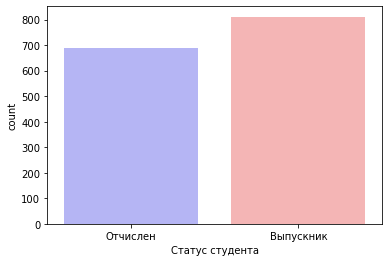

In [50]:
sns.countplot(x="Статус студента", data=df_copy, palette="bwr")
plt.show()

In [51]:
df_copy['Пол студента'].value_counts()

Женский    922
Мужской    579
Name: Пол студента, dtype: int64

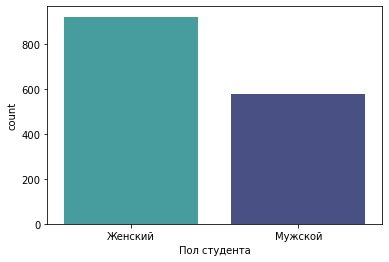

In [52]:
sns.countplot(x='Пол студента', data=df_copy, palette="mako_r")
plt.show()

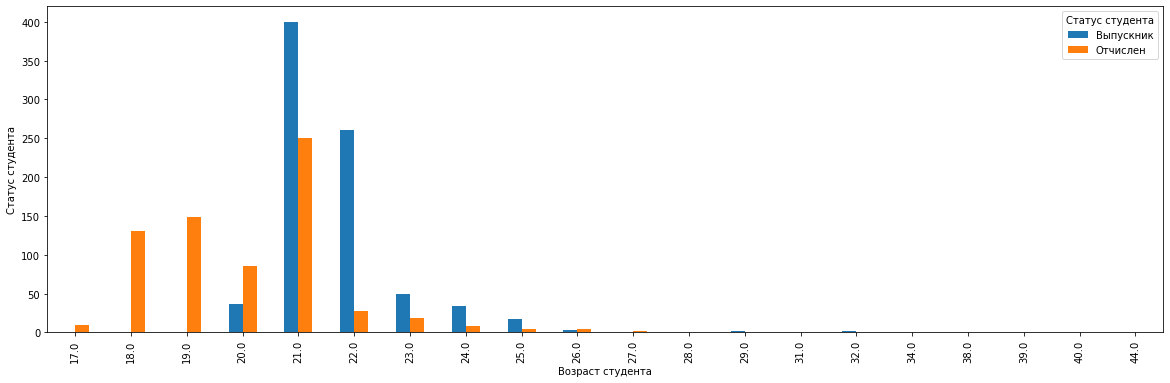

In [53]:
pd.crosstab(df_copy["Возраст студента"],df_copy["Статус студента"]).plot(kind="bar",figsize=(20,6))
plt.xlabel('Возраст студента')
plt.ylabel('Статус студента')
plt.show()

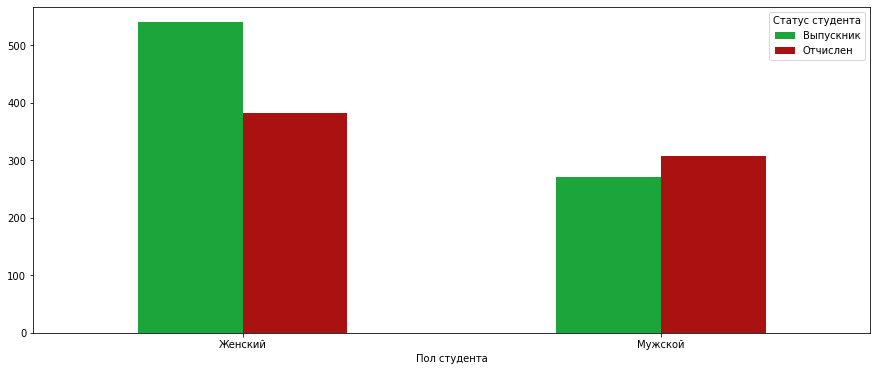

In [54]:
pd.crosstab(df_copy["Пол студента"],df_copy["Статус студента"]).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.show()

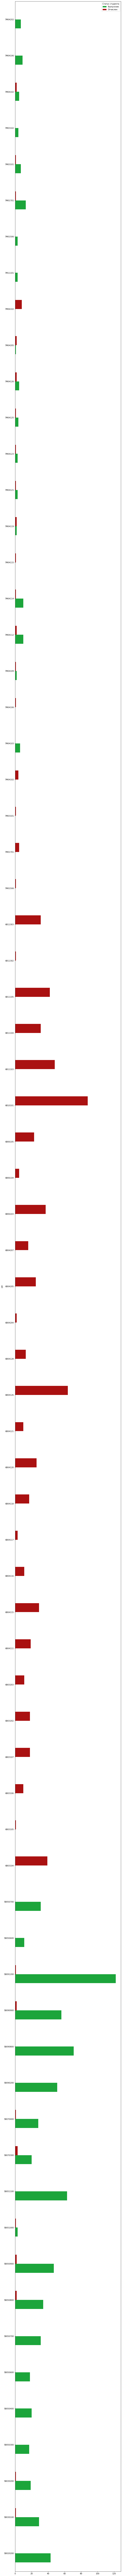

In [55]:
pd.crosstab(df_copy["ОП"],df_copy["Статус студента"]).plot(kind="barh",figsize=(10,250),color=['#1CA53B','#AA1111' ])

plt.show()

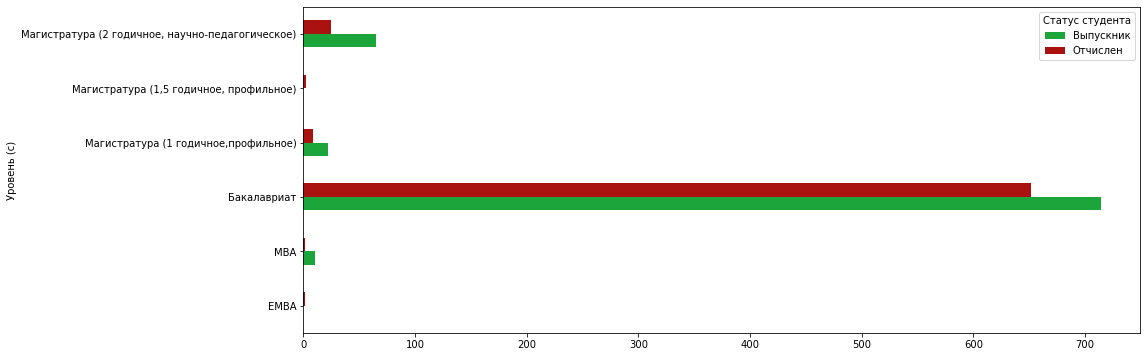

In [56]:
pd.crosstab(df_copy["Уровень (с)"],df_copy["Статус студента"]).plot(kind="barh",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.show()

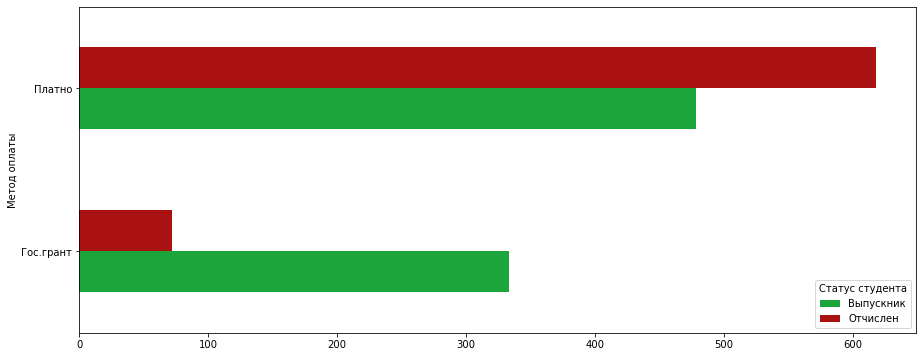

In [57]:
pd.crosstab(df_copy["Метод оплаты"],df_copy["Статус студента"]).plot(kind="barh",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.show()

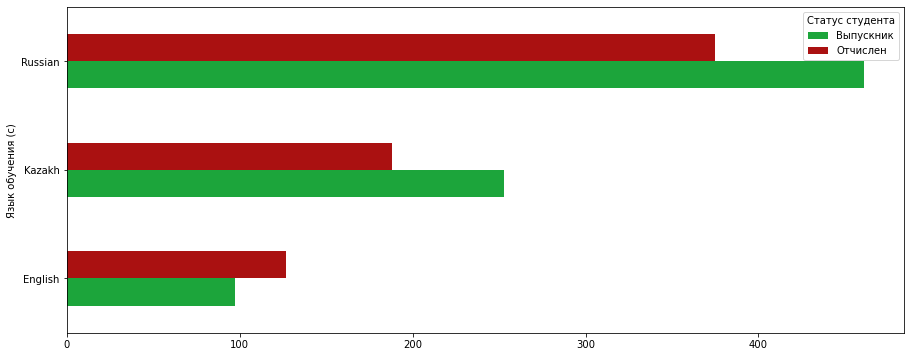

In [58]:
pd.crosstab(df_copy["Язык обучения (с)"],df_copy["Статус студента"]).plot(kind="barh",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.show()

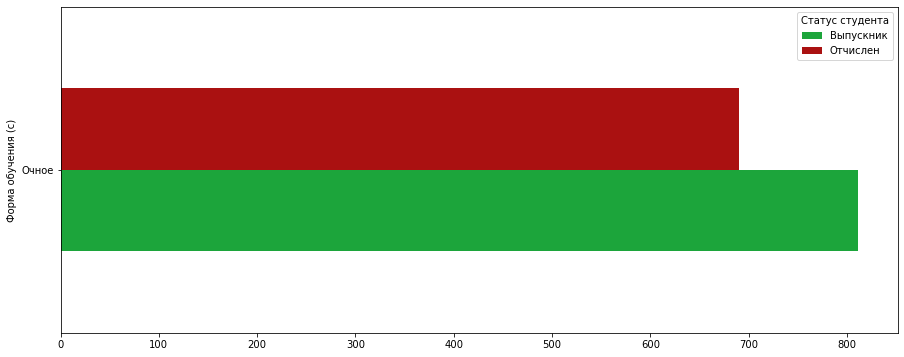

In [59]:
pd.crosstab(df_copy["Форма обучения (с)"],df_copy["Статус студента"]).plot(kind="barh",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.show()

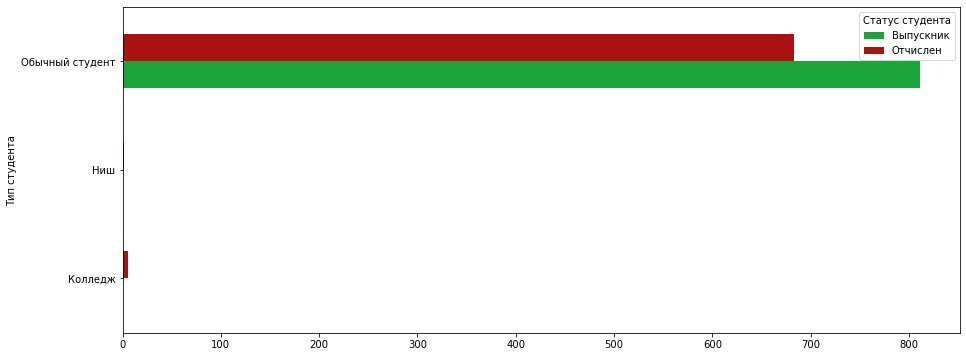

In [60]:
pd.crosstab(df_copy["Тип студента"],df_copy["Статус студента"]).plot(kind="barh",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.show()

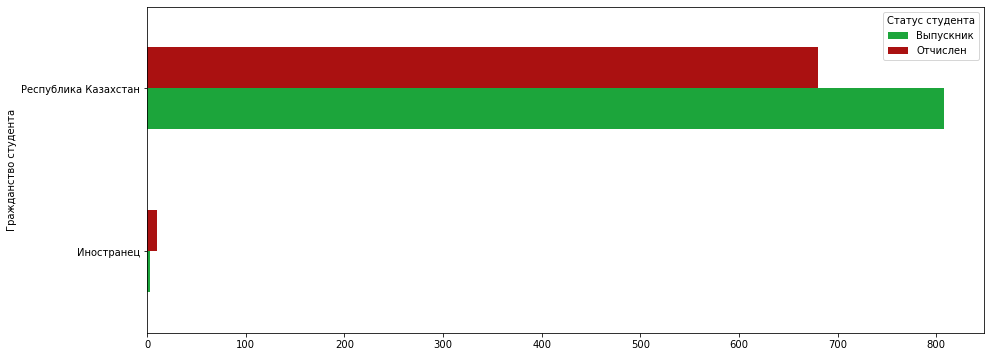

In [61]:
pd.crosstab(df_copy["Гражданство студента"],df_copy["Статус студента"]).plot(kind="barh",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.show()

In [62]:
df_copy

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Статус студента,Тип студента,Метод оплаты,Пол студента,Гражданство студента,Возраст студента,ВСК1,ВСК2,Экзамен,Итоговая,Попытка экзамена FX,Летник
Баркод,,,,,,,,,,,,,,,,
2110221,6B11303,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан,18.0,9.937500,6.562500,4.500000,3.875000,1.0,0.0
2111424,6B04126,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Женский,Республика Казахстан,18.0,77.066667,75.933333,64.733333,82.466667,1.0,0.0
2111290,6B11103,Бакалавриат,Очное,Kazakh,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан,18.0,7.000000,2.400000,0.000000,0.000000,1.0,0.0
2111109,6B11303,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Гос.грант,Мужской,Республика Казахстан,18.0,69.400000,65.800000,57.066667,74.133333,1.0,0.0
2110439,6B06105,Бакалавриат,Очное,Russian,Отчислен,Обычный студент,Платно,Мужской,Республика Казахстан,18.0,28.266667,33.000000,25.400000,34.533333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140505,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан,21.0,36.222222,19.888889,0.000000,0.000000,0.0,0.0
2140510,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан,21.0,27.000000,9.888889,0.000000,0.000000,0.0,0.0
2140458,6B10101,Бакалавриат,Очное,English,Отчислен,Обычный студент,Платно,Женский,Республика Казахстан,21.0,36.333333,20.111111,0.000000,0.000000,0.0,0.0


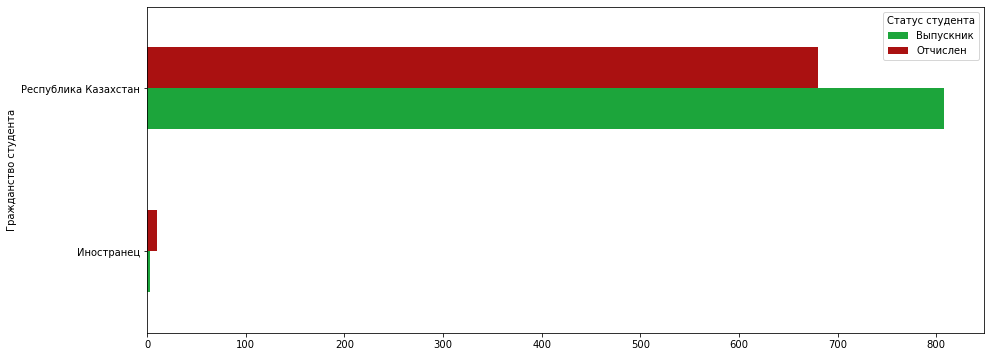

In [63]:
pd.crosstab(df_copy["Гражданство студента"],df_copy["Статус студента"]).plot(kind="barh",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.show()

In [64]:
y = df["Статус студента"]

In [65]:
y

Баркод
2110221    1
2111424    1
2111290    1
2111109    1
2110439    1
          ..
2140505    1
2140510    1
2140458    1
2140478    1
2140491    1
Name: Статус студента, Length: 1501, dtype: int32

In [66]:
x = df.drop(["Статус студента"], axis=1)

In [67]:
x

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Тип студента,Метод оплаты,Пол студента,Гражданство студента,Возраст студента,ВСК1,ВСК2,Экзамен,Итоговая,Попытка экзамена FX,Летник
Баркод,,,,,,,,,,,,,,,
2110221,45,2,0,1,2,0,0,1,18.0,9.937500,6.562500,4.500000,3.875000,1.0,0.0
2111424,32,2,0,1,2,0,0,1,18.0,77.066667,75.933333,64.733333,82.466667,1.0,0.0
2111290,41,2,0,1,2,0,1,1,18.0,7.000000,2.400000,0.000000,0.000000,1.0,0.0
2111109,45,2,0,2,2,0,1,1,18.0,69.400000,65.800000,57.066667,74.133333,1.0,0.0
2110439,39,2,0,2,2,1,1,1,18.0,28.266667,33.000000,25.400000,34.533333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140505,40,2,0,0,2,1,0,1,21.0,36.222222,19.888889,0.000000,0.000000,0.0,0.0
2140510,40,2,0,0,2,1,0,1,21.0,27.000000,9.888889,0.000000,0.000000,0.0,0.0
2140458,40,2,0,0,2,1,0,1,21.0,36.333333,20.111111,0.000000,0.000000,0.0,0.0


In [68]:
x.describe()

,ОП,Уровень (с),Форма обучения (с),Язык обучения (с),Тип студента,Метод оплаты,Пол студента,Гражданство студента,Возраст студента,ВСК1,ВСК2,Экзамен,Итоговая,Попытка экзамена FX,Летник
count,1501.000000,1501.000000,1501.0,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,24.931379,2.194537,0.0,1.407728,1.991339,0.730180,0.385743,0.991339,21.000666,57.390850,53.900100,51.693099,51.883676,0.391073,0.175883
std,17.011720,0.733574,0.0,0.735060,0.128808,0.444014,0.486933,0.092691,1.988131,31.218969,33.823513,36.751461,36.302912,0.756941,0.633281
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2.000000,0.0,1.000000,2.000000,0.000000,0.000000,1.000000,20.000000,30.466667,19.750000,5.555556,7.666667,0.000000,0.000000
50%,19.000000,2.000000,0.0,2.000000,2.000000,1.000000,0.000000,1.000000,21.000000,69.000000,66.500000,69.555556,69.272727,0.000000,0.000000
75%,40.000000,2.000000,0.0,2.000000,2.000000,1.000000,1.000000,1.000000,22.000000,84.375000,83.625000,84.375000,83.625000,1.000000,0.000000
max,70.000000,5.000000,0.0,2.000000,2.000000,1.000000,1.000000,1.000000,44.000000,99.625000,99.600000,99.000000,99.000000,5.000000,6.000000


In [69]:
from sklearn.model_selection import train_test_split

# Select the features and the target
x = x.values

# define standard scaler
scaler = preprocessing.MinMaxScaler()
# transform data
x = scaler.fit_transform(x)

In [70]:
print(x.min())
print(x.max())

0.0
1.0


In [71]:
y = y.values

In [72]:
# Split the data info training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34, stratify=y)

In [73]:
print(x_train.shape)
print(y_train.shape)

(1200, 15)
(1200,)


In [74]:
print(x_test.shape)
print(y_test.shape)

(301, 15)
(301,)


In [75]:
method_names = []
method_scores = []

Logistic Regression Classification Test Accuracy 0.9634551495016611


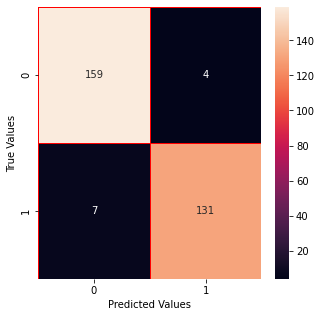

In [76]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'score')

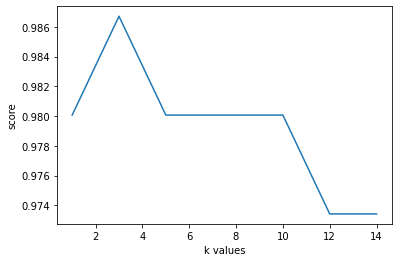

In [77]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 2: 0.9800664451827242


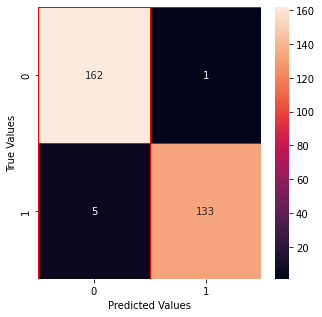

In [78]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 2: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'Method Score')

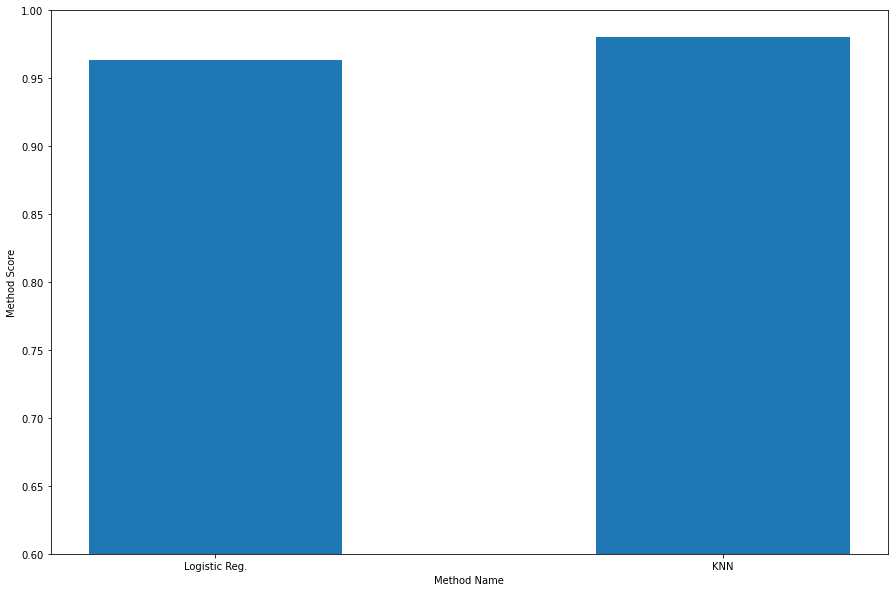

In [79]:
plt.figure(figsize=(15,10))
plt.ylim([0.6,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')